In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import helpers as helper
from nems import get_setting

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2020-04-08 211401.log


In [2]:
db_path = get_setting('NEMS_RESULTS_DIR')

## SELECT BATCH, set ON/OFF octave cutoff

In [3]:
batch = 309
cutoff = 0.5  # octaves from target freq to be considered ON BF
r0_threshold = 0
st_sig = 'st.pup.afl.pxf'
p0 = 'st.pup0.afl.pxf0'
b0 = 'st.pup.afl0.pxf0'
st_sig0 = 'st.pup0.afl0.pxf0'

## Preprocess df and calculate unique MI / gain

In [5]:
df = helper.preprocess_sdexp_dump('d_pup_afl_pxf_sdexp.csv', batch=batch,
                                 full_model=st_sig, p0=p0, b0=b0, shuf_model=st_sig0,
                                 r0_threshold=0, octave_cutoff=cutoff, path=db_path)

FileNotFoundError: File b'/auto/data/nems_db/resultsnems_lbhb/pupil_behavior_scripts/d_309_tuning.csv' does not exist

In [143]:
df.head()

,state_chan_alt,gain_task,MI_task,dc_task,sig_task,tar_freq,gain_pupil,MI_pupil,dc_pupil,sig_pupil,BF,SNR,oct_diff,ON_BF,OFF_BF,sig_psth
cellid,,,,,,,,,,,,,,,,
BRT005c-a1,ACTIVE_1,-0.039731,0.018677,0.020278,False,1000.0,-0.168459,-0.032731,-0.073463,False,2703.0,5.492757,1.434562,False,True,True
BRT005c-a1,ACTIVE_2,0.046970,0.057314,0.093748,False,1000.0,-0.168459,-0.032731,-0.073463,False,2703.0,5.492757,1.434562,False,True,True
BRT006d-a1,ACTIVE_1,-0.269171,-0.030076,-0.025949,False,2000.0,-0.080642,-0.030290,-0.024993,False,1439.0,4.963518,0.474933,True,False,True
BRT006d-a1,ACTIVE_2,0.145815,0.022636,0.018950,False,2000.0,-0.080642,-0.030290,-0.024993,False,1439.0,4.963518,0.474933,True,False,True
BRT006d-a2,ACTIVE_1,0.241455,0.048722,0.020780,False,2000.0,-0.080468,-0.073963,-0.060466,False,3220.0,5.479147,0.687061,False,True,True


## Plot behavior results

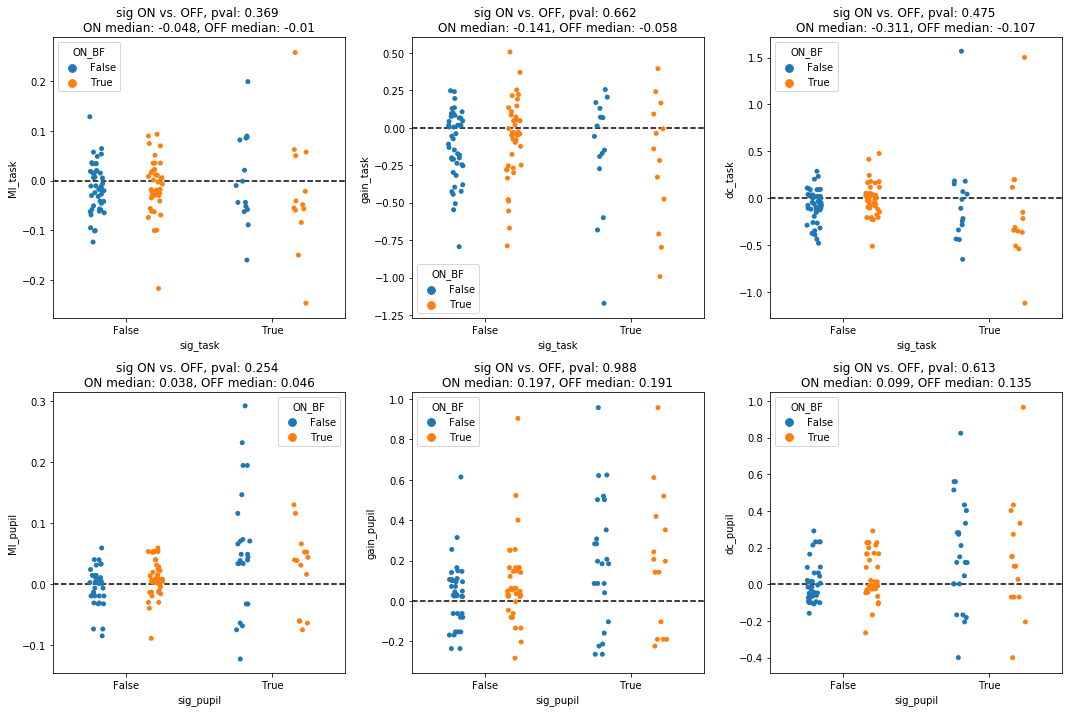

In [144]:
fix_ylims = False
data = df[df.sig_psth]

f, ax = plt.subplots(2, 3, figsize=(15, 10))

# BEHAVIOR results
# MI
sns.stripplot(x='sig_task', y='MI_task', hue='ON_BF', data=data, dodge=True, ax=ax[0, 0])
ax[0, 0].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_task'] & data['ON_BF']]['MI_task'], data[data['sig_task'] & data['OFF_BF']]['MI_task']).pvalue, 3)
on_median = np.round(data[data['sig_task'] & data['ON_BF']]['MI_task'].median(), 3)
off_median = np.round(data[data['sig_task'] & data['OFF_BF']]['MI_task'].median(), 3)
ax[0, 0].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# Gain
sns.stripplot(x='sig_task', y='gain_task', hue='ON_BF', data=data, dodge=True, ax=ax[0, 1])
ax[0, 1].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_task'] & data['ON_BF']]['gain_task'], data[data['sig_task'] & data['OFF_BF']]['gain_task']).pvalue, 3)
on_median = np.round(data[data['sig_task'] & data['ON_BF']]['gain_task'].median(), 3)
off_median = np.round(data[data['sig_task'] & data['OFF_BF']]['gain_task'].median(), 3)
ax[0, 1].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# DC
sns.stripplot(x='sig_task', y='dc_task', hue='ON_BF', data=data, dodge=True, ax=ax[0, 2])
ax[0, 2].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_task'] & data['ON_BF']]['dc_task'], data[data['sig_task'] & data['OFF_BF']]['dc_task']).pvalue, 3)
on_median = np.round(data[data['sig_task'] & data['ON_BF']]['dc_task'].median(), 3)
off_median = np.round(data[data['sig_task'] & data['OFF_BF']]['dc_task'].median(), 3)
ax[0, 2].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# PUPIL results
# MI
sns.stripplot(x='sig_pupil', y='MI_pupil', hue='ON_BF', data=data, dodge=True, ax=ax[1, 0])
ax[1, 0].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_pupil'] & data['ON_BF']]['MI_pupil'], data[data['sig_pupil'] & data['OFF_BF']]['MI_pupil']).pvalue, 3)
on_median = np.round(data[data['sig_pupil'] & data['ON_BF']]['MI_pupil'].median(), 3)
off_median = np.round(data[data['sig_pupil'] & data['OFF_BF']]['MI_pupil'].median(), 3)
ax[1, 0].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# Gain
sns.stripplot(x='sig_pupil', y='gain_pupil', hue='ON_BF', data=data, dodge=True, ax=ax[1, 1])
ax[1, 1].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_pupil'] & data['ON_BF']]['gain_pupil'], data[data['sig_pupil'] & data['OFF_BF']]['gain_pupil']).pvalue, 3)
on_median = np.round(data[data['sig_pupil'] & data['ON_BF']]['gain_pupil'].median(), 3)
off_median = np.round(data[data['sig_pupil'] & data['OFF_BF']]['gain_pupil'].median(), 3)
ax[1, 1].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# DC
sns.stripplot(x='sig_pupil', y='dc_pupil', hue='ON_BF', data=data, dodge=True, ax=ax[1, 2])
ax[1, 2].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_pupil'] & data['ON_BF']]['dc_pupil'], data[data['sig_pupil'] & data['OFF_BF']]['dc_pupil']).pvalue, 3)
on_median = np.round(data[data['sig_pupil'] & data['ON_BF']]['dc_pupil'].median(), 3)
off_median = np.round(data[data['sig_pupil'] & data['OFF_BF']]['dc_pupil'].median(), 3)
ax[1, 2].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

if fix_ylims:
    for a in [ax[0, 1], ax[0, 2], ax[1, 1], ax[1, 2]]:
        a.set_ylim((-2, 2))
        
f.tight_layout()

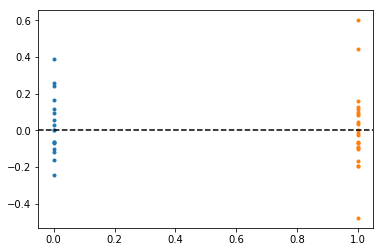

In [132]:
on_gt = data[data['sig_task'] & data['ON_BF']].groupby(by='cellid').mean()['dc_task']
off_gt = data[data['sig_task'] & data['OFF_BF']].groupby(by='cellid').mean()['dc_task']
plt.plot(np.zeros(len(on_gt)), on_gt, '.')
plt.plot(np.ones(len(off_gt)), off_gt, '.')
plt.axhline(0, linestyle='--', color='k')

## Compare cells that were recorded for both ON/OFF conditions

In [145]:
on_cells = df[df['ON_BF']].index.unique()
off_cells = df[df['OFF_BF']].index.unique()
matched = np.unique([c for c in df.index.unique() if (c in on_cells.values) & (c in off_cells.values)])
print('{0} cellids found for both condtions'.format(len(matched)))

19 cellids found for both condtions


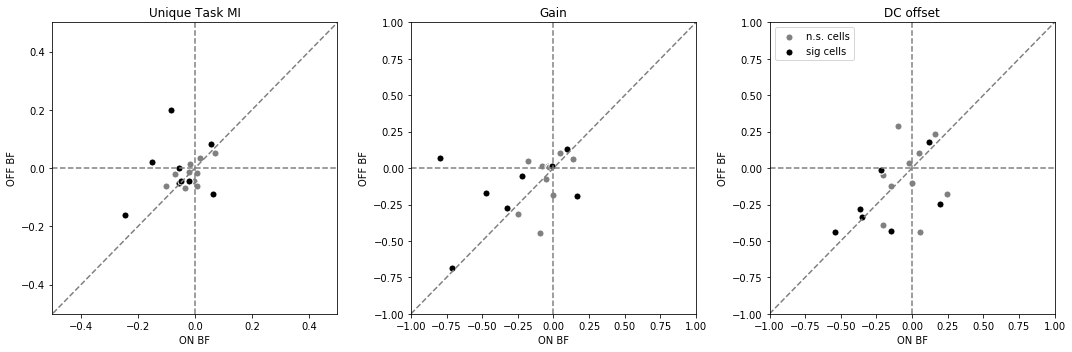

In [147]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

taskON = df[df.index.isin(matched) & (df.ON_BF)].groupby(by='cellid').mean()
taskOFF = df[df.index.isin(matched) & (df.OFF_BF)].groupby(by='cellid').mean()



ax[0].set_title('Unique Task MI')
ax[0].scatter(taskON['MI_task'], taskOFF['MI_task'], color='grey', edgecolor='white', s=50)
ax[0].scatter(taskON[taskON.sig_task]['MI_task'], 
                taskOFF[taskOFF.sig_task]['MI_task'], color='k', edgecolor='white', s=50)
ax[0].plot([-1, 1], [-1, 1], 'grey', linestyle='--')
ax[0].axhline(0, linestyle='--', color='grey')
ax[0].axvline(0, linestyle='--', color='grey')
ax[0].set_xlim((-.5, .5))
ax[0].set_ylim((-.5, .5))
ax[0].set_xlabel('ON BF')
ax[0].set_ylabel('OFF BF')

axlim = 1
ax[1].set_title('Gain')
ax[1].scatter(taskON['gain_task'], taskOFF['gain_task'], color='grey', edgecolor='white', s=50)
ax[1].scatter(taskON[taskON.sig_task]['gain_task'], 
                taskOFF[taskOFF.sig_task]['gain_task'], color='k', edgecolor='white', s=50)
ax[1].plot([-axlim, axlim], [-axlim, axlim], 'grey', linestyle='--')
ax[1].axhline(0, linestyle='--', color='grey')
ax[1].axvline(0, linestyle='--', color='grey')
ax[1].set_xlim((-axlim, axlim))
ax[1].set_ylim((-axlim, axlim))
ax[1].set_xlabel('ON BF')
ax[1].set_ylabel('OFF BF')

ax[2].set_title('DC offset')
ax[2].scatter(taskON['dc_task'], taskOFF['dc_task'], color='grey', edgecolor='white', s=50, label='n.s. cells')
ax[2].scatter(taskON[taskON.sig_task]['dc_task'], 
                taskOFF[taskOFF.sig_task]['dc_task'], color='k', edgecolor='white', s=50, label='sig cells')
ax[2].plot([-axlim, axlim], [-axlim, axlim], 'grey', linestyle='--')
ax[2].axhline(0, linestyle='--', color='grey')
ax[2].axvline(0, linestyle='--', color='grey')
ax[2].legend()
ax[2].set_xlim((-axlim, axlim))
ax[2].set_ylim((-axlim, axlim))
ax[2].set_xlabel('ON BF')
ax[2].set_ylabel('OFF BF')

f.tight_layout()

In [81]:
matched

array(['BRT016f-a1', 'ley027f-a1', 'ley027g-a1', 'ley027g-a2',
       'ley034g-a1', 'ley040j-a1', 'ley040k-a1', 'ley046g-04-1',
       'ley046g-11-1', 'ley046g-12-1', 'ley046g-23-1', 'ley046g-30-1',
       'ley046g-31-1', 'ley046g-31-2', 'ley046g-36-1', 'ley046g-39-1',
       'ley046g-57-1', 'ley049h-a1', 'ley049h-a2'], dtype='<U12')

In [82]:
df.loc[matched]

,state_chan_alt,gain_task,MI_task,dc_task,sig_task,tar_freq,gain_pupil,MI_pupil,dc_pupil,sig_pupil,BF,SNR,oct_diff,ON_BF,OFF_BF,sig_psth
cellid,,,,,,,,,,,,,,,,
BRT016f-a1,ACTIVE_1,-1.102571,-0.051492,-7.081655,False,600.0,-1.276784,-0.019737,-1.966732,False,1167.0,301.375974,0.959770,False,True,True
BRT016f-a1,ACTIVE_2,0.386699,-0.032114,-5.802382,False,600.0,-1.276784,-0.019737,-1.966732,False,1167.0,301.375974,0.959770,False,True,True
BRT016f-a1,ACTIVE_3,4.006915,0.034215,1.781635,False,600.0,-1.276784,-0.019737,-1.966732,False,1167.0,301.375974,0.959770,False,True,True
BRT016f-a1,ACTIVE_4,-3.627255,0.005757,4.938715,False,1200.0,-1.276784,-0.019737,-1.966732,False,1167.0,301.375974,0.040230,True,False,True
ley027f-a1,ACTIVE_1,3.300477,0.062500,3.987575,True,6000.0,0.437073,0.007395,0.421664,False,5367.0,41.695805,0.160847,True,False,True
ley027f-a1,ACTIVE_2,-3.835177,-0.088963,-4.876211,True,1500.0,0.437073,0.007395,0.421664,False,5367.0,41.695805,1.839153,False,True,True
ley027g-a1,ACTIVE_1,0.941929,0.016565,0.974613,False,6700.0,-4.480010,-0.064116,-4.109377,True,7617.0,4.335849,0.185062,True,False,True
ley027g-a1,ACTIVE_2,2.116632,0.034461,2.047514,False,1675.0,-4.480010,-0.064116,-4.109377,True,7617.0,4.335849,2.185062,False,True,True
ley027g-a2,ACTIVE_1,-1.642634,-0.018931,-0.424139,False,6700.0,2.937041,-0.014128,-2.150897,False,6622.0,9.958190,0.016894,True,False,True
